# More on plotting
files needed = ('chile.xlsx', 'broadband_size.xlsx', 'auto_data.dta')

### The seaborn package
We have been using matplotlib to plot. This is a very low-level package, meaning that we have a lot of fine-grained control of the elements of our plots. I like fine-grained control because it means I can makes things look exactly how I want it. It also means that we have to type a lot of code to create a figure. 

In this notebook we introduce the *seaborn* package. Seaborn is written on top of matplotlib and automates some of the creation of plots. This can be very helpful, but remember **do not trust the defaults.** 

Seaborn also includes some plot types that are not easy to do in matplotlib. Great!

We will cover: 
* `regplot()` which adds the line-of-best-fit to a scatter plot
* `jointplot()` which adds the marginal distributions to the axes
* Scaling scatter markers with a third variable
* Facet plots

Along the way, we will take a look at the *World Development Indicators*.


In [1]:
import pandas as pd                    # our go-to for data handling                  
import matplotlib.pyplot as plt        # make plots, but doesn't automate much
import seaborn as sns                  # some new plot types, more automation

pd.set_option('precision', 3)       # this tells pandas to print out 3 decimal places when we print a DataFrame

## World Development Indicators
The World Bank's [World Development Indicators](http://databank.worldbank.org/data/source/world-development-indicators) is a great source of economic and social data for many countries and many years. I have already downloaded output and consumption data for a few countries and saved it as 'wdi.csv'. 

The database is great: lots of variables, countries and time. I have extracted a small data file for Chile. The files that come out of the download facility are a mess. Let's clean them up.  

In [2]:
# I looked at the workbook and noticed the footer and that nas are '..'.
wdi = pd.read_excel('chile.xlsx', na_values='..', skipfooter=5)
wdi.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Chile,CHL,GDP (constant LCU),NY.GDP.MKTP.KN,1.594e+13,1.678e+13,1.745e+13,1.847e+13,1.894e+13,1.912e+13,...,125823838388000,1.325e+14,137876215768070,1.403e+14,1.435e+14,1.460e+14,147736095622350,153570668110240,155189982580250,NaN
1,Chile,CHL,Final consumption expenditure (constant LCU),NE.CON.TOTL.KN,1.336e+13,1.402e+13,1.461e+13,1.515e+13,1.514e+13,1.529e+13,...,93785024589700,9.909e+13,103336792108318,1.063e+14,1.090e+14,1.128e+14,116887472687087,121369080634627,122348544930031,NaN


There is a lot to not like about this DataFrame. 
* There are unneeded variables. 
* The unit of observation is a year, so the I want the years in the index.
* The year data are a mix of numbers and letters.


In [3]:
wdi = wdi.drop(['Country Name', 'Country Code', 'Series Code'], axis=1)
wdi.head()

,Series Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP (constant LCU),1.594e+13,1.678e+13,1.745e+13,1.847e+13,1.894e+13,1.912e+13,2.127e+13,22039895161000,2.283e+13,...,125823838388000,1.325e+14,137876215768070,1.403e+14,1.435e+14,1.460e+14,147736095622350,153570668110240,155189982580250,NaN
1,Final consumption expenditure (constant LCU),1.336e+13,1.402e+13,1.461e+13,1.515e+13,1.514e+13,1.529e+13,1.700e+13,17541684272603,1.823e+13,...,93785024589700,9.909e+13,103336792108318,1.063e+14,1.090e+14,1.128e+14,116887472687087,121369080634627,122348544930031,NaN


Cleaning up the dates is bit complicated but not impossible. I will slice each column name and take the first four characters. Then convert those first four characters to an `int`. The first column name is not a date, so I need to skip that.  

In [4]:
temp = [wdi.columns[0]] + [int(c[0:4]) for c in wdi.columns[1:]]
temp
wdi.columns = temp
wdi.head()


,Series Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,GDP (constant LCU),1.594e+13,1.678e+13,1.745e+13,1.847e+13,1.894e+13,1.912e+13,2.127e+13,22039895161000,2.283e+13,...,125823838388000,1.325e+14,137876215768070,1.403e+14,1.435e+14,1.460e+14,147736095622350,153570668110240,155189982580250,NaN
1,Final consumption expenditure (constant LCU),1.336e+13,1.402e+13,1.461e+13,1.515e+13,1.514e+13,1.529e+13,1.700e+13,17541684272603,1.823e+13,...,93785024589700,9.909e+13,103336792108318,1.063e+14,1.090e+14,1.128e+14,116887472687087,121369080634627,122348544930031,NaN


Looking better! Let's set the 'Series Name' as the index and then transpose the DataFrame. We will learn more about reshaping data in the future. 

In [5]:
wdi = wdi.set_index('Series Name')
wdi = wdi.transpose()
wdi.head()

Series Name,GDP (constant LCU),Final consumption expenditure (constant LCU)
1960,1.594e+13,1.336e+13
1961,1.678e+13,1.402e+13
1962,1.745e+13,1.461e+13
1963,1.847e+13,1.515e+13
1964,1.894e+13,1.514e+13


In [6]:
wdi.columns = ['gdp_real', 'cons_real']
wdi.head()

,gdp_real,cons_real
1960,1.594e+13,1.336e+13
1961,1.678e+13,1.402e+13
1962,1.745e+13,1.461e+13
1963,1.847e+13,1.515e+13
1964,1.894e+13,1.514e+13


Lastly, let's compute the growth rates of real gdp and consumption. 

In [7]:
wdi_gr = wdi.pct_change()*100
wdi_gr.head()

,gdp_real,cons_real
1960,NaN,NaN
1961,5.245,4.953
1962,4.027,4.237
1963,5.840,3.682
1964,2.557,-0.113


### sns.regplot( )
Our go-to scatterplot in matplotlib does not offer an easy way to add a simple line of best fit. We can separately estimate the regression and then plot the fitted values, but seaborn provides a simple way to get that same look. 

The `regplot( )` function [(docs)](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) adds a fitted regression and confidence interval to a scatter.  

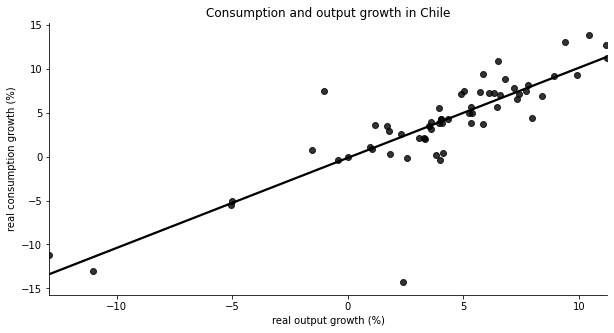

In [8]:
my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_real',                                        # column to put on x axis
            y='cons_real',                                       # column to put on y axis 
            data=wdi_gr,                                         # the data
            ax = my_ax,                                          # an axis object
            color = 'black',                                  
            ci = 0)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title('Consumption and output growth in Chile')
my_ax.set_ylabel('real consumption growth (%)')
my_ax.set_xlabel('real output growth (%)')

plt.show()

Looking good! The default regression spec is OLS, but you can specify a more complicated model. Interestingly, you *cannot* recover the coefficients (slope, intercept) of the estimated regression. The person who developed seaborn is apparently [quite adamant](https://github.com/mwaskom/seaborn/issues/655) about this. 

Notice the different syntax seaborn exposes. 

```python 
sns.regplot(x, y, data, ax)
```

We do not pass the columns of data directly, like we would with matplotlib. Instead, we pass the DataFrame and the column names of the variables we want to plot. 

We can pass `regplot()` an axis object, `ax = my_ax` in the code above, to attach the plot to a specific axis. If we omit the ax argument, `regplot()` will create an axis object for us.  

### Confidence interval 

Let's specify a 95 percent *confidence interval*. 

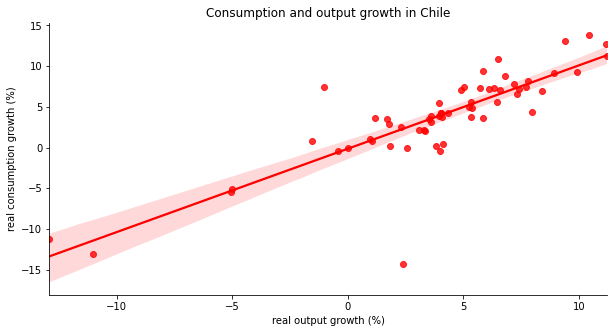

In [9]:
my_fig, my_ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_real',                                        # column to put on x axis
            y='cons_real',                                       # column to put on y axis 
            data=wdi_gr,    # the data
            ax = my_ax,                                          # an axis object
            color = 'red',                                  
            ci = 95)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title('Consumption and output growth in Chile')
my_ax.set_ylabel('real consumption growth (%)')
my_ax.set_xlabel('real output growth (%)')

plt.show()

### sns.jointplot( )
`jointplot( )` adds the marginal distributions of the plotted variables to the axis of a regplot ([docs](https://seaborn.pydata.org/generated/seaborn.jointplot.html)). 

This may be useful for visualizing the marginal distributions, but **is it important that your reader see the marginal distributions? Is it telling them something important?** Potentially, but remember, just because you can do something, doesn't mean you always should. 

h is a <class 'seaborn.axisgrid.JointGrid'>


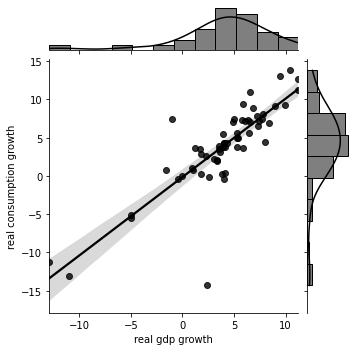

In [10]:
# Rather than call plt.subplots, let seaborn create the fig and axes.
# h is the axis-like object.

h = sns.jointplot(x='gdp_real', 
                  y='cons_real', 
                  kind='reg',                        # specify a regplot in the main plot area
                  data=wdi_gr,
                  ci=95, 
                  color = 'black',
                  height = 5                         # we can still control the figure size
                 )                                             

h.set_axis_labels('real gdp growth', 'real consumption growth')

# what is h?
print('h is a', type(h))

plt.show()

Notice that I did not start my figure by creating fig and axes objects. Instead, I let seaborn create the fig and axes for me. The return from `sns.jointplot()` is a JointGrid object created by seaborn. This is a more complicated figure, so it needs more complicated axes ojects. 


## Practice
The OECD has a project studying [broadband internet coverage](http://www.oecd.org/sti/broadband/broadband-statistics/) across countries. It tracks data on numbers of subscribers, speed, and prices. 

1. Load 'broadband_size.xlsx'. It contains data on broadband accounts per 100 people, GDP per capita, and population (in thousands) for several countries. Are all your variables okay? 
2. Give the columns some reasonable names. 


3. Create a `.regplot()` with broadband penetration on the y axis and GDP  per capita on the x axis. Add the 95 percent confidence interval. Make it look nice. 

4. The relationship doesn't look very linear to me. Replot your solution from 3. but try adding the `logx=True` option to regplot to regress y = log(x). As always, consult the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) if you need help.

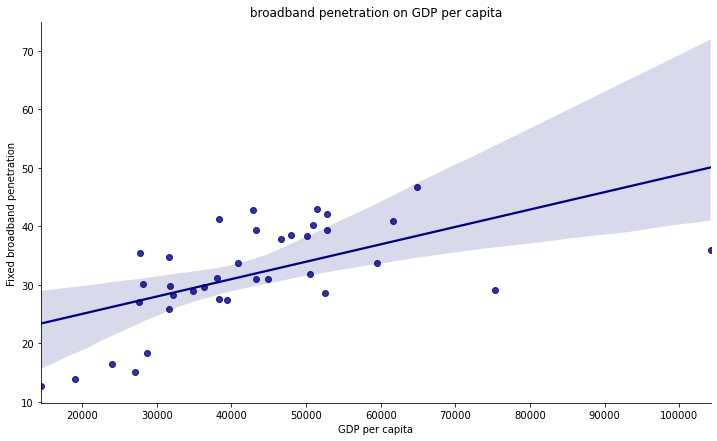

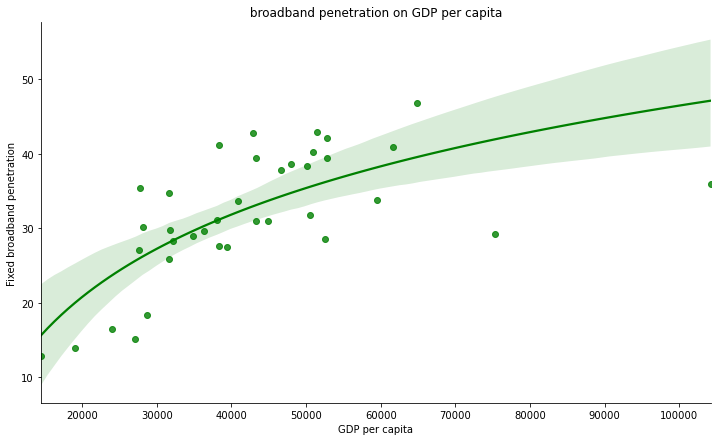

In [22]:
# practice
    #1
broadband = pd.read_excel('broadband_size.xlsx')
broadband.dtypes
    #2
broadband.columns = ['city', 'broad_pene', 'gdp_capita', 'popul']
broadband
    #3
broadband_plot, my_ax = plt.subplots(figsize=(12,7)) 

sns.regplot(x='gdp_capita',                                        # column to put on x axis
            y='broad_pene',                                       # column to put on y axis 
            data=broadband,    # the data
            ax = my_ax,                                          # an axis object
            color = 'navy',                                  
            ci = 95)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title(' broadband penetration on GDP per capita ')
my_ax.set_ylabel('Fixed broadband penetration')
my_ax.set_xlabel('GDP per capita')

plt.show()

    #4

broadband_plot, my_ax = plt.subplots(figsize=(12,7)) 

sns.regplot(x='gdp_capita',                                        # column to put on x axis
            y='broad_pene',
            # column to put on y axis 
            data=broadband,    # the data
            ax = my_ax,                                          # an axis object
            color = 'green',
            logx=True,
            ci = 95)                                              # confidence interval, 0 supresses it

# Easier than matplotlib!
sns.despine(ax = my_ax)                             

# Since this is all in a matplotlib axis/figure, our usual labeling applies.  
my_ax.set_title(' broadband penetration on GDP per capita ')
my_ax.set_ylabel('Fixed broadband penetration')
my_ax.set_xlabel('GDP per capita')

plt.show()


### Bubble plot (and passing keywords)
A bubble plot is a scatter plot in which the size of the data markers (usually a circle) varies with a third variable. 

We can actually make these plots in matplotlib. The syntax is 
```python
ax.plot(x, y, s) 
```
where `s` is the variable corresponding to marker size. Since seaborn is built on top of matplotlib, we can pass *scatter keyword arguments* to `.regplot( )` and these get passed through to the underlying scatter. 

If we pass a single number to `s` it changes the size of all the bubbles. If we pass it a Series of data, then each bubble gets scaled according to its value in the series. 

The syntax for the option is `scatter_kws={'s': data_var}`. This sets the `s` argument of scatter to `data_var`. 

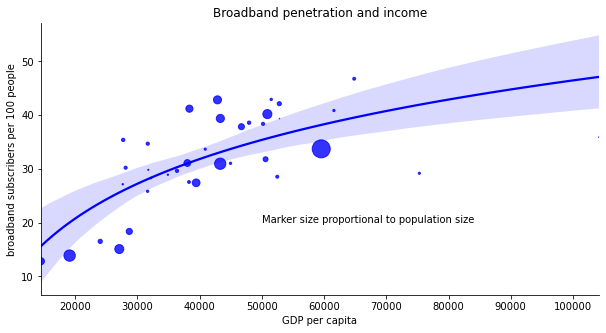

In [25]:
# broadband.columns = ['city', 'broad_pene', 'gdp_capita', 'popul']
fig, ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_capita', y='broad_pene', data=broadband,    # the data
            ax = ax,                                   # an axis object
            scatter_kws={'s': broadband['popul']/1000},      # make the marker proportional to population            
            #scatter_kws={'s': 25},
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression
                      
# We need to let the reader know what the bubble sizes represent.
ax.text(50000, 20, 'Marker size proportional to population size')

sns.despine(ax = ax)  
                                   

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

Notice that I have scaled population by 1000. The issue is that `s` is interpreted as points^2 (points squared) [[docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)]. The idea is that the area of the marker increases proportional to the square of the width.  There is a good discussion of it at [stack overflow](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size).

If you try to use `s` and your whole figure turns the color of your marker, you probably need to scale your measure for `s`. 

Another example of the scatter_kws useage is to customize the scatter colors and alpha.

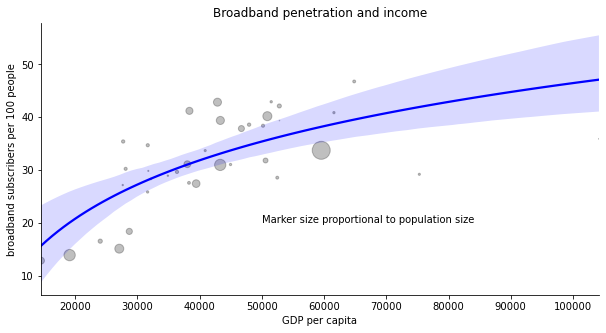

In [26]:
# broadband.columns = ['city', 'broad_pene', 'gdp_capita', 'popul']
fig, ax = plt.subplots(figsize=(10,5)) 

# To keep the call to regplot from getting out of control, I define the scatter keywords dict here.
my_kws={'s': broadband['popul']/1000, 'alpha':0.25, 'color':'black'}

sns.regplot(x='gdp_capita', y='broad_pene', data=broadband,    # the data
            ax = ax,                                   # an axis object
            scatter_kws = my_kws,                      # pass parameters to scatter
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression

# We need to let the reader know what the bubble sizes represent.
ax.text(50000, 20, 'Marker size proportional to population size')                                                         

sns.despine(ax = ax)
                                   

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

## Facet plots

Facet plots are grids of plots with the same x- and y-axes. Each plot in the grid is a different subset of the sample. Seaborn gives us simple way to make these plots. 

We often use facet plots in initial exploratory analysis. If we do not know what we are looking for, a facet plot is a good way to start "eye-balling" relationships. Once we have some ideas, we can narrow down our focus and use more precise tools. In general, **we do not include large grids of figures in our finished analysis.** They contain too much unnecessary information.

Load the file 'auto_data.dta' which contains data on automobile characteristics in the European market. These data are from [Miravete, Moral, and Thurk](https://www3.nd.edu/~jthurk/Papers/MMT_RAND.pdf).

In [27]:
df = pd.read_stata('auto_data.dta')
df.head(3)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
0,10102,1,4.0,Fiat,Alfa Romeo,ALFA 164,1995,27.581,179.0,0.048,179.134,69.291,1.241,3039.647,0,40.554,0.71,4
1,10103,1,4.0,Fiat,Alfa Romeo,ALFA 145,1995,20.202,4934.0,0.041,161.024,67.323,1.084,2511.013,0,38.560,0.71,2
2,10104,1,4.0,Fiat,Alfa Romeo,ALFA 155,1995,23.651,1017.0,0.048,174.803,67.039,1.172,2671.586,0,35.107,0.71,3


In [28]:
# Recode the FUEL variable so I can easily understand it.
df['FUEL'] = df['FUEL'].replace({0:'gasoline', 1:'diesel'})
df.sample(5)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
964,20506,1,14.0,PSA,Citroen,SAXO,1999,15.596,8524.0,0.029,146.063,62.598,0.914,1969.692,diesel,60.680,0.651,1
884,11704,1,11.0,Mercedes,Mercedes,E SERIE 300,1999,53.697,1.0,0.063,188.913,70.472,1.331,3551.762,gasoline,29.375,0.849,4
1138,12406,1,15.0,Renault,Renault,LAGUNA,2000,20.328,1518.0,0.043,177.165,68.898,1.221,2786.344,gasoline,37.336,1.042,3
126,20205,1,19.0,Volkswagen,Audi,A6,1995,58.408,1.0,0.036,188.583,69.685,1.314,3160.573,diesel,51.134,0.516,4
425,10803,1,5.0,Ford,Ford,MONDEO,1997,21.030,1885.0,0.040,179.134,68.898,1.234,2852.423,gasoline,40.554,0.800,3


Looking at the data, we see that a unit of observation is a model at a point in time. We see prices and quantities sold and characteristics about the model. Let's cut the data down to VW and try some plots. 

In [29]:
vw = df[df['FIRM']=='Volkswagen']
vw.sample(8)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
294,12803,1,19.0,Volkswagen,Skoda,FELICIA,1996,10.527,159827.0,0.027,151.575,64.173,0.973,2026.432,gasoline,41.266,0.765,1
816,23206,1,19.0,Volkswagen,Volkswagen,LUPO,1998,8.295,29385.0,0.028,138.583,64.173,0.889,2158.590,diesel,65.337,0.597,1
497,12706,1,19.0,Volkswagen,Seat,AROSA,1997,14.036,9482.0,0.026,138.976,64.173,0.892,1903.084,gasoline,50.046,0.800,1
1149,12701,1,19.0,Volkswagen,Seat,IBIZA,2000,23.762,621.0,0.028,152.362,64.567,0.984,2176.211,gasoline,44.380,1.042,1
498,12803,1,19.0,Volkswagen,Skoda,FELICIA,1997,10.851,119988.0,0.030,151.575,64.173,0.973,2059.471,gasoline,42.891,0.800,1
178,22701,1,19.0,Volkswagen,Seat,IBIZA,1995,17.295,9885.0,0.032,150.000,64.567,0.969,2158.590,diesel,53.458,0.516,1
7,10204,1,19.0,Volkswagen,Audi,A4,1995,38.669,4.0,0.046,175.984,68.110,1.199,2698.238,gasoline,40.554,0.710,3
1034,23202,1,19.0,Volkswagen,Volkswagen,PASSAT,1999,24.839,199.0,0.037,183.858,68.504,1.260,3001.101,diesel,61.354,0.651,3


**Q: How are vehicle weight and fuel efficiency related? Does it vary by fuel type? Does it vary by brand?**

* Volkswagen has four brands during this period: Audi, Seat, Skoda, and Volkswagen. 
* There are two fuel types: gasoline and diesel. 

Let's make a grid of plots where the rows are the brands and columns are the fuel types. This is a 4x2 grid. 

In each plot, we will scatter weight vs. mpg.

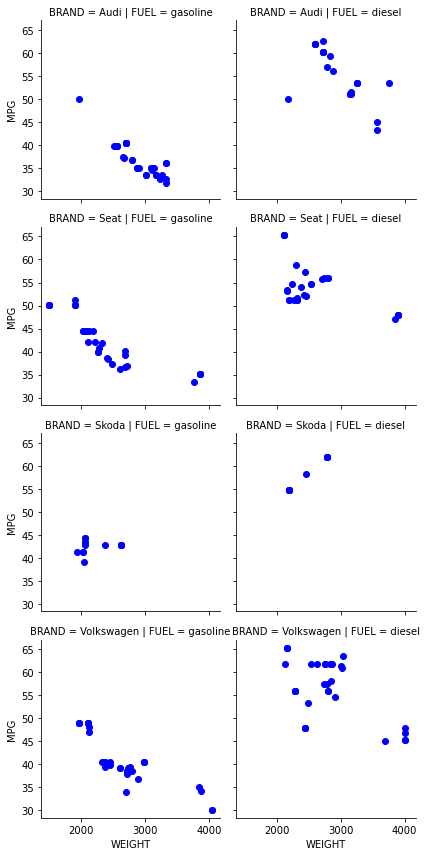

In [30]:
g = sns.FacetGrid(vw, row='BRAND', col='FUEL')
g.map(plt.scatter, "WEIGHT", "MPG", color='blue')

plt.show()

What is a point in a plot? It is a model-year. 

What do we see? 

* Diesel vehicles tend to get higher mpg
* Within a fuel type, the range of mpg are similar
* Weight and mpg are usually negatively correlated (Skoda diesel?)
* There is heterogeneity in the number of models per brand

### Facet plot syntax
We first create the grid using `FacetGrid()`. We specify which DataFrame we are plotting and which variables we want for the rows and columns. These variables should be *categorical* and should have relatively few potential values. Otherwise, the grid would get very large and it would be hard to interpret. 

```python
g = sns.FacetGrid(vw, row='BRAND', col='FUEL')
```

Next, we map a plot type to the grid using `map()`. We can make many types of plots. In this case we have used the `scatter()` plot from matplotlib. Notice the `plt` that precedes the `scatter`. We can also pass any keyword arguments that `plt.scatter` accepts.    

```python
g.map(plt.scatter, "WEIGHT", "MPG", color='blue')
```

Now lets try a different plot type, `regplot()` from Seaborn. It's easier to see the relationship between weight and mpg. 


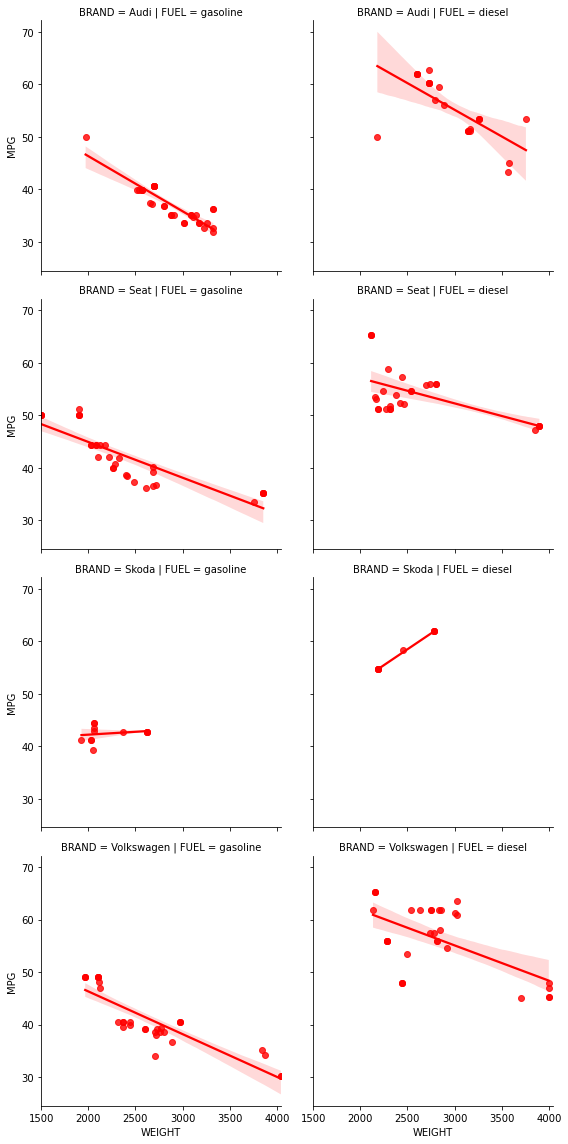

In [31]:
g = sns.FacetGrid(vw, row='BRAND', col='FUEL', height=4)
g.map(sns.regplot, "WEIGHT", "MPG", color='red', ci=90)

plt.show()

**Q: Are more powerful cars more expensive? Does it depend on fuel type? Brand?**

We are not limited to just one type of data in each plot. We can use color to differentiate further. In the next figure we add Ford, PSA, and Fiat to the firms in our DataFrame. Each firm has several brands and each brand has several models.

* Columns are still fuel type
* Rows are now firms (VW, Ford, PSA, Fiat)
* Hue (color) is brand (Ford's Volvo; Fiat's Alfa Romeo, etc.)
```python
g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM')
```

In each plot we have 
* Price vs HP
* I'm using a scatter plot

```python
g.map(plt.scatter, "PRICE", "HP")
```

In [ ]:
# Create a dataframe with just these firms
firms = ['Ford', 'PSA', 'Volkswagen', 'Fiat']
to_plot = df[df['FIRM'].isin(firms)]

g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM')
g.map(plt.scatter, "PRICE", "HP")
g.add_legend()
plt.show()

## Practice: Facet Plots



1. **Q: How is size related to price? Does it differ by firm? By brand? By fuel type?**

Use a facet plot to explore these questions. Restrict the DataFrame to include only Ford, PSA, Volkswagen, and Fiat. 

2. Let's explore a related concept, the `pairplot` [[docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html)]. Try

```python
g=sns.pairplot(df, vars=['PRICE', 'HP', 'WEIGHT'])
```

What does `pairplot` do? Why do we only need to look at the upper or lower triangle of the figure? What is on the diagonal?

3. How do these relationships differ by fuel type? Use the 'hue' option (and the documentation).